In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Our implementation of the Euler Characteristic Transform
# Code extracted from https://github.com/amezqui3/ect_and_barley
import ECT 
import plot_ECT

# Loading subset of binary MNIST data
(Code for creation in ECT.py)

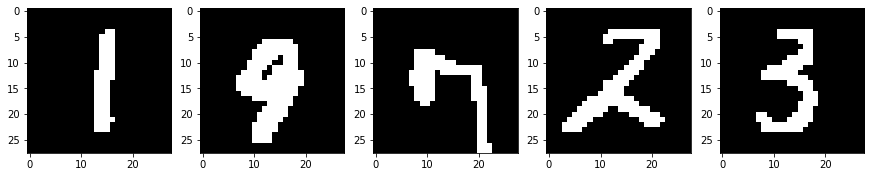

In [2]:
IM = np.load('./data/binary_MNIST_100.npy')
labels = np.load('./data/binary_MNIST_100_labels.npy')

nplot = 5
fig, ax = plt.subplots(1,nplot,figsize=(15,15))
for i in range(nplot):
    ax[i].imshow(IM[np.random.randint(0,len(IM))], cmap='gray');

# Convert to Graph and Compute Example ECTs 

In [3]:
NCells = [ECT.complexify(IM[i], center=False) for i in range(len(IM))]

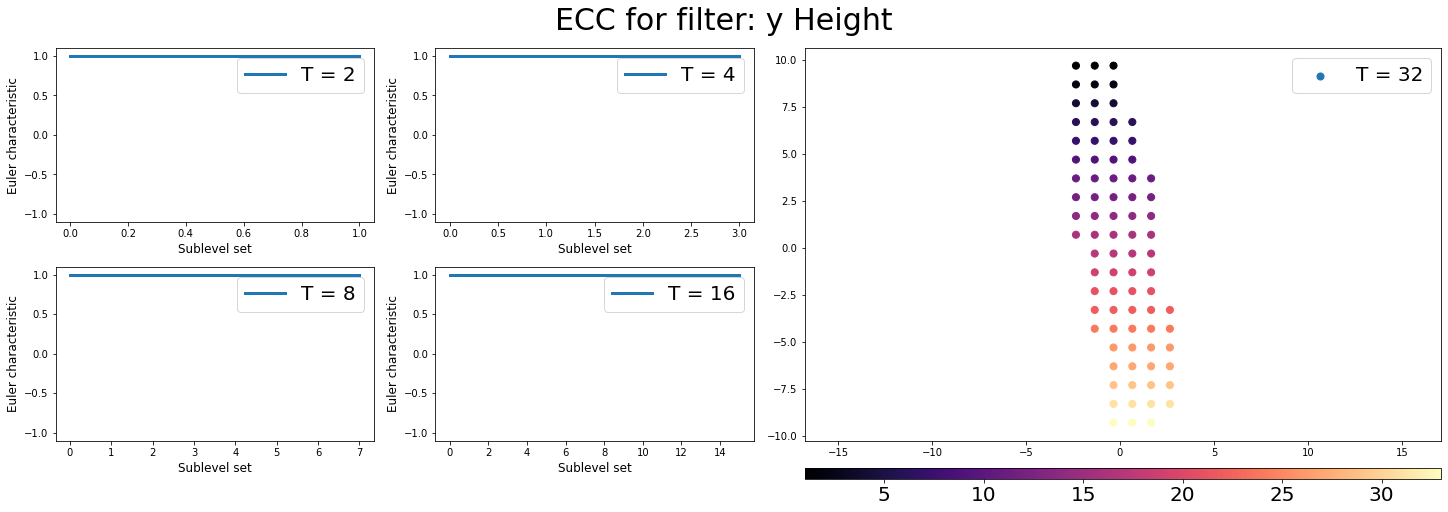

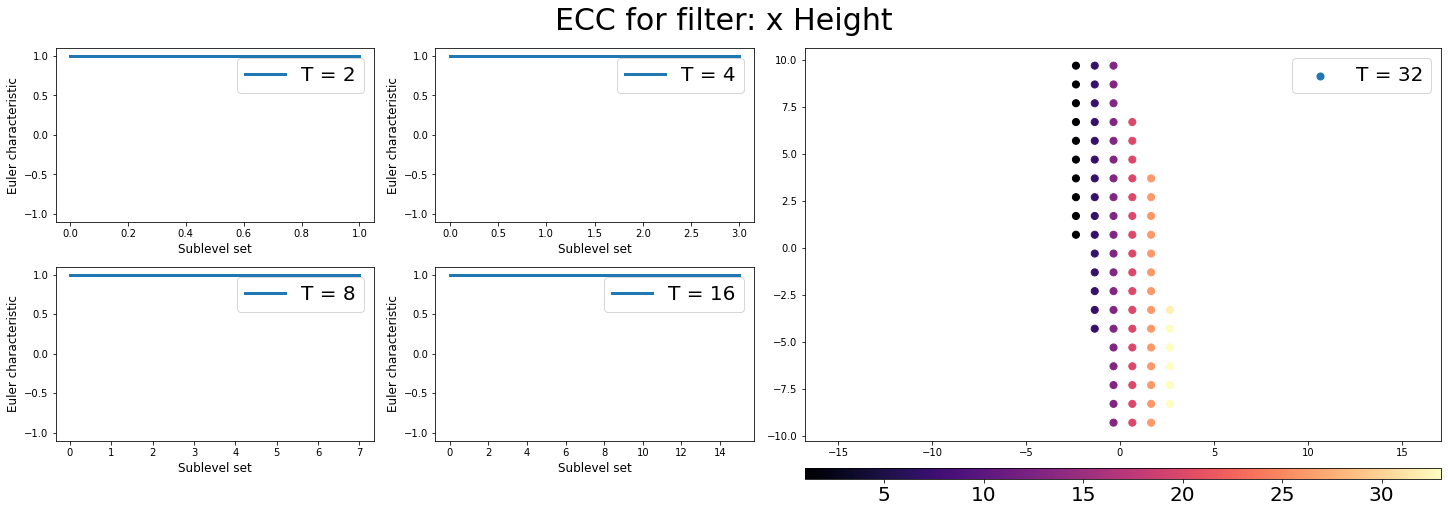

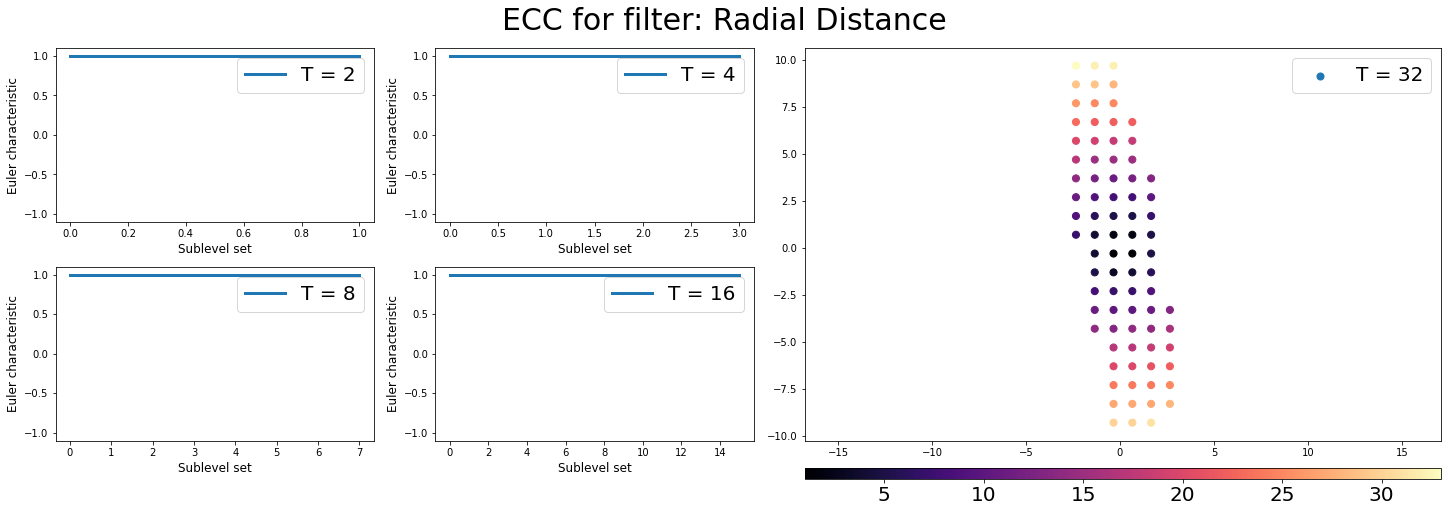

In [4]:
# plotted examples
im_num = np.random.randint(0, len(NCells))

coords = ECT.centerVertices(NCells[im_num][0])
eq_angles = np.linspace(0, 2*np.pi, num=4, endpoint=False)
circle_dirs = np.column_stack((np.cos(eq_angles), np.sin(eq_angles)))
y_dir = circle_dirs[0]
x_dir = circle_dirs[1]

y_heights = np.sum(coords*y_dir, axis=1)
x_heights = np.sum(coords*x_dir, axis=1)
rad_dist = np.linalg.norm(coords, axis = 1)

plot_ECT.plot_ecc_filtration(coords, NCells[im_num], y_heights, T=[2,4,8,16], title = 'y Height', ylim = (-1,1))

plot_ECT.plot_ecc_filtration(coords, NCells[im_num], x_heights, T=[2,4,8,16], title = 'x Height', ylim = (-1,1))

plot_ECT.plot_ecc_filtration(coords, NCells[im_num], rad_dist, T=[2,4,8,16], title = 'Radial Distance', ylim = (-1,1))

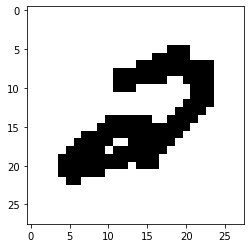

<Figure size 1080x360 with 0 Axes>

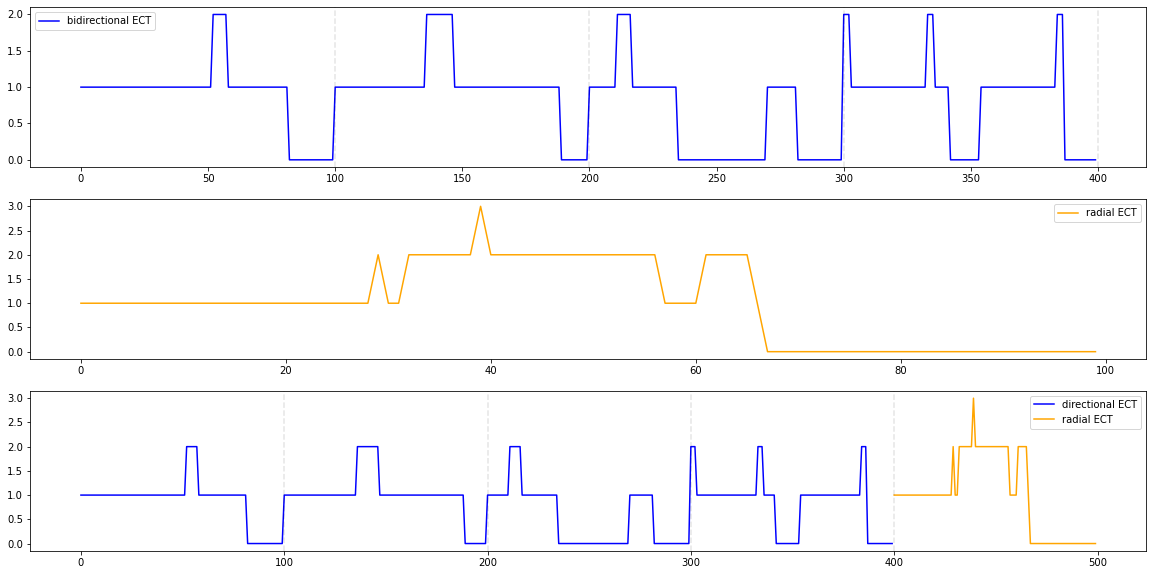

In [6]:
img = 1
T = 100

plt.imshow(IM[img], cmap = 'binary')
plt.show()
fig = plt.figure(figsize = (15, 5))


fig, ax = plt.subplots(3,1,figsize = (20,10))
dECT = ECT.directional_ect(NCells[img], T=T)
ax[0].plot(dECT, label = 'bidirectional ECT', color = 'blue')
ax[0].axvline(T, alpha=.1, color = 'black', ls = '--')
ax[0].axvline(2*T, alpha=.1, color = 'black', ls = '--')
ax[0].axvline(3*T, alpha=.1, color = 'black', ls = '--')
ax[0].axvline(4*T, alpha=.1, color = 'black', ls = '--')
ax[0].legend()
      
rECT = ECT.radial_ect(NCells[img], T=T)
ax[1].plot(rECT, label = 'radial ECT', color = 'orange')
ax[1].legend()  

ax[2].plot(np.arange(0, len(dECT)), dECT, label = 'directional ECT', color = 'blue')
ax[2].plot(np.arange(len(dECT), len(dECT)+len(rECT)), rECT, label = 'radial ECT', color = 'orange')
ax[2].axvline(T, alpha=.1, color = 'black', ls = '--')
ax[2].axvline(2*T, alpha=.1, color = 'black', ls = '--')
ax[2].axvline(3*T, alpha=.1, color = 'black', ls = '--')
ax[2].axvline(4*T, alpha=.1, color = 'black', ls = '--')
ax[2].legend()

# Creation of Bidirectional + Radial ECT MNIST Dataset

In [3]:
# check and fix this block later!! (10-6-22)

# # creation of order-randomized binary MNIST data with seed
# seed = 1
# MNIST        = ECT.generate_binary_MNIST(N = 100, loc = './data/', seed = seed)
# MNIST_labels = ECT.generate_binary_MNIST(loc = './data/', seed = seed)
# graph_MNIST  = ECT.generate_graph_MNIST(MNIST, loc = './data/')
# MNIST_ECT    = ECT.generate_MNIST_ECT(graph_MNIST, MNIST_labels, T=16, loc = './data/')

# Let's Try Classification via ECT Vector Distance

In [4]:
np.load('./data/binary_MNIST_labels.npy')

array([6, 2, 7, ..., 5, 0, 0], dtype=uint8)

In [2]:
# full mnist dataset with 2 dir (xy) and radial ect
graph_MNIST = np.load('./data/graph_MNIST.npy', allow_pickle = True)
# MNIST_ECT = np.load('./data/MNIST_ECT_4dir_norad_T16.npy')

Accuracy = 88.0 %


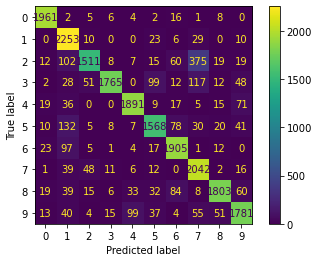

In [60]:
# taking the path of least resistance and using sklearn knn for now
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(MNIST_ECT[:,1:], MNIST_ECT[:,0], test_size=0.3)

neigh = KNeighborsClassifier(5, metric = 'hamming')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

# results 
print("Accuracy =", 100*round(sum(y_pred==y_test)/len(y_test),3), '%')
C = confusion_matrix(y_test, y_pred)
#do log
ConfusionMatrixDisplay(C).plot()

# # --------------------------- approx code used to optimize for k --------------------------------------------
# param_grid = {'n_neighbors': [4,10,15]}
# neigh = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', verbose=True)
# neigh.fit(X_train, y_train)
# print(neigh.best_params_)

(Oct 6.) Originally did 5 fold CV with n_neighbors $[ 5, 16, 27, 38, 50]$, 16 giving the best result as returned by GridSearchCV (accuracy of 81% on our true test set). \
After this I did a finer search within the values $[10,20]$, giving a best value of 10. \
Finally I restricted to a search within $[5,10]$ and again got $k=10$ as the optimal value. This is then the final chosen $k$.

(Oct. 11) With 4 dir another quick 5 fold CV gave k=4 as our best parameter. Probably changes substaintially with ndir, but only changed accuracy less than .5% so whatever

## Quick Test: Do it again but without radial ECT 

Accuracy = 76.9 %


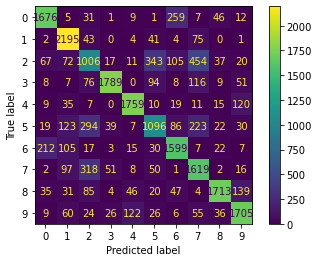

In [11]:
X_train, X_test, y_train, y_test = train_test_split(MNIST_ECT[:,1:21], MNIST_ECT[:,0], test_size=0.3)

# when optimized for k, it was found __ gives the best accuracy by 5-fold CV
neigh = KNeighborsClassifier(10)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

print("Accuracy =", 100*round(sum(y_pred==y_test)/len(y_test),3), '%')
C = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(C).plot()

Seems like the radial ECT is helping differentiate between 0 and 6. They look similar from top or bottom for most of the ECT, but radially the 6's tail is picked up much earlier in the ECT, causing them to be less similar throughout.

# WIP: How does accuracy scale with number of directions chosen?

In [31]:
import utils

Using TensorFlow backend.


In [48]:
accuracy = []
T=16

for i,n_angle in enumerate(np.arange(10,25)):
    print(i)
    MNIST_ECTT = utils.generate_MNIST_ECT(graph_MNIST, MNIST_labels = MNIST_ECT[:,0], T = T, savefile=False,
                                         angles = np.linspace(0, 2*np.pi, n_angle, endpoint = False))

    X_train, X_test, y_train, y_test = train_test_split(MNIST_ECTT[:,1:], MNIST_ECTT[:,0], test_size=0.3)

    neigh = KNeighborsClassifier(5)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)

    accuracy.append(100*round(sum(y_pred==y_test)/len(y_test),3))

0
1CT computation 100.0% complete
2CT computation 100.0% complete
3CT computation 100.0% complete
4CT computation 100.0% complete
5CT computation 100.0% complete
6CT computation 100.0% complete
7CT computation 100.0% complete
8CT computation 100.0% complete
9CT computation 100.0% complete
10T computation 100.0% complete
11T computation 100.0% complete
12T computation 100.0% complete
13T computation 100.0% complete
14T computation 100.0% complete


ERROR! Session/line number was not unique in database. History logging moved to new session 819


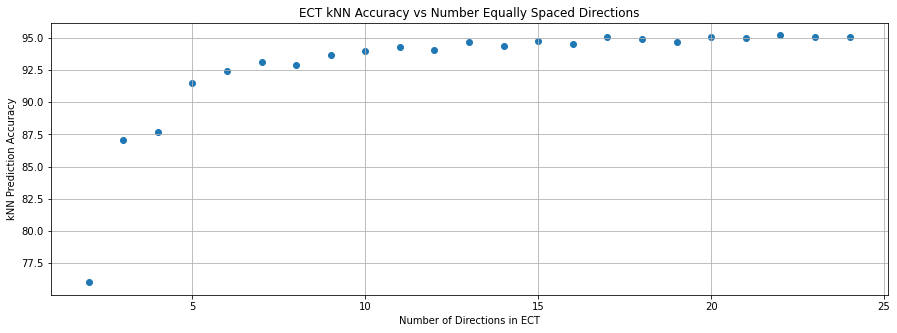

In [59]:
full_accuracy = np.load('./data/kNN_ECTaccuracy_1_25.npy')
fig = plt.figure(figsize = (15,5))

plt.scatter(np.arange(2,25), full_accuracy[1:])
plt.xlabel('Number of Directions in ECT')
plt.ylabel('kNN Prediction Accuracy')
plt.title('ECT kNN Accuracy vs Number Equally Spaced Directions')
plt.grid()
plt.savefig('./plots/kNN_ECT_accuracy.png')